<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:3em;text-align:center">Dust Detection on solar panels by using 📳InceptionV3 </div>

![](https://kenbrooksolar.com/wp-content/uploads/2016/02/100kw-and-above-Solar-power-Plants.png)

![](https://www.pv-magazine-india.com/wp-content/uploads/sites/8/2021/03/01025_Clean_vs_dusty_opt.jpeg)

<a id="1"></a> <br>
<span class="label label-default" style="background-color:Brown; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Objective of this project 📊📈</span>


1. **Solar panels work by converting sunlight into electricity. If dirt, dust, or other debris accumulates on the surface of the solar panels, it can reduce the amount of sunlight that is absorbed, which can lead to a decrease in the amount of electricity that is generated.**

2. **The amount of energy loss depends on the level of dirt and debris on the solar panels. According to the Solar Energy Power Association, dirty solar panels can lose up to 20% of their energy output. The National Renewable Energy Laboratory puts that figure even higher, at 25%.**

3. **In addition to reducing the amount of electricity that is generated, dirty solar panels can also shorten the lifespan of the solar panels. This is because the dirt and debris can trap moisture, which can cause corrosion and other damage to the solar panels.**

4. **For these reasons, it is important to clean solar panels regularly. The frequency of cleaning will depend on a number of factors, including the environment in which the solar panels are located. In general, however, most manufacturers recommend that solar panels be cleaned at least twice a year.**

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import PIL
from PIL import Image

In [1]:
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from itertools import chain
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

2024-07-09 09:19:19.558825: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 09:19:19.610965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 09:19:19.611740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 09:19:20.951464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow_io")

In [3]:
BATCH_SIZE = 48

image_height = 299
image_width = 299

In [4]:
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )
print('Data Augmentation 2 was created')

data_generator_3 = ImageDataGenerator (rescale=1./255)

Data Augmentation 1 was created
Data Augmentation 2 was created


In [33]:
# Read the image
train_generator1 = data_generator_1.flow_from_directory(
    directory = "/home/jovyan/shared/Learning materials/subsections/1.*/code/data/Detect_solar_dust/", # images data path / folder in which images are there
#     subset = 'training',
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 1234)

test_generator = data_generator_2.flow_from_directory(
    directory = "/home/jovyan/shared/Learning materials/subsections/1.*/code/data/Detect_solar_dust/", # images data path / folder in which images are there
#     subset = 'validation',
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 1234)

Found 62 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [30]:
dict_class = train_generator1.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'.ipynb_checkpoints': 0, 'Clean': 1, 'Dusty': 2}
Class labels: ['.ipynb_checkpoints', 'Clean', 'Dusty']


ValueError: 'label' must be of length 'x'

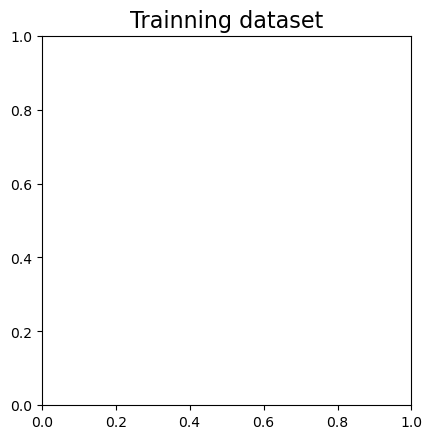

In [34]:
frequency = np.unique(train_generator1.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [35]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of normal images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in train_generator1.classes if label == 1]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of normal images:", len([label for label in test_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 1]))
print()

Dataset Characteristics of Train Data Set:
Number of images: 62
Number of normal images: 0
Number of pneumonia images: 31

Dataset Characteristics of Test Data Set:
Number of images: 62
Number of normal images: 0
Number of pneumonia images: 31



In [36]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{1: 1.0, 2: 1.0}

Train image data from Data Augmentation 1


/home/jovyan/my-conda-envs/myenv/lib/python3.10/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


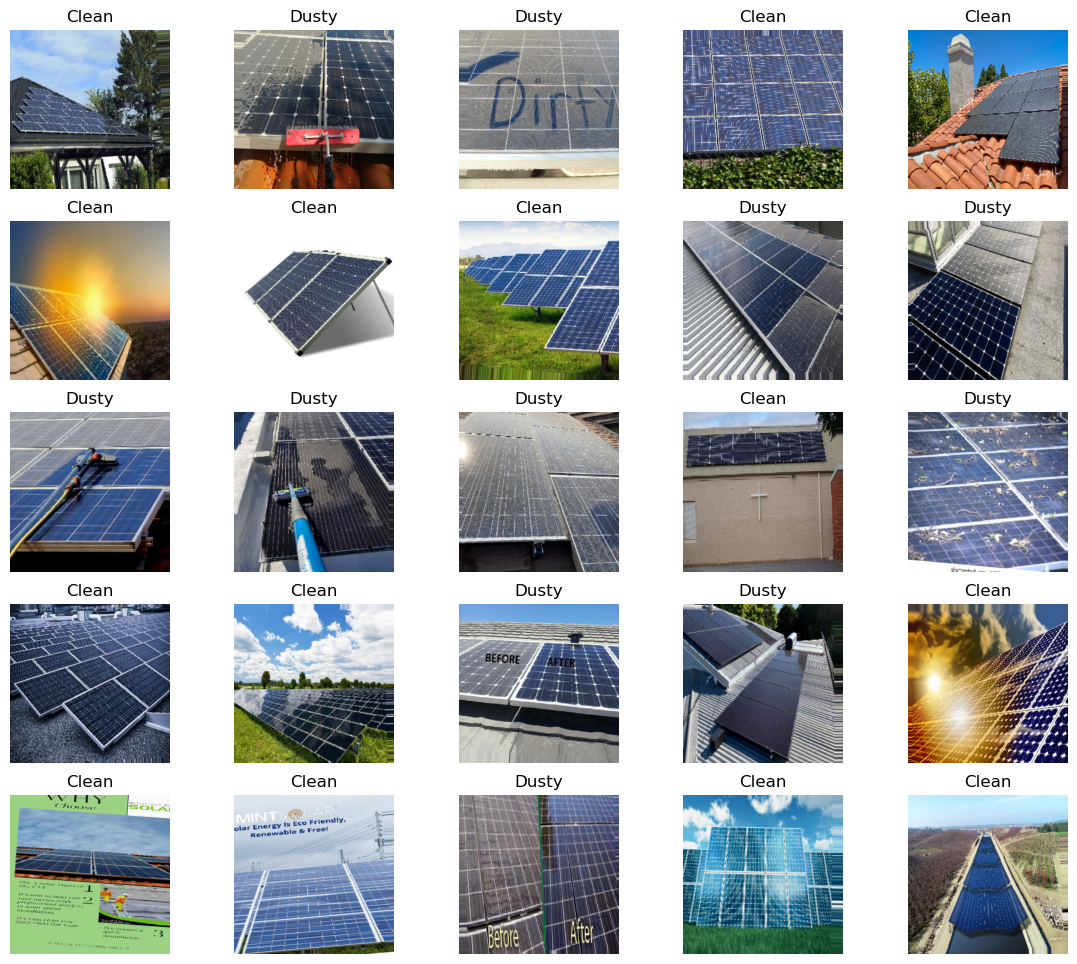

In [37]:
# Image Samples
print('Train image data from Data Augmentation 1')
img, label = next(train_generator1)
# print(len(label))

plt.figure(figsize=[14, 12])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])    
plt.show()

In [38]:
EPOCHS = 20
num_gpus = 2
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10, verbose=1)
train_data = train_generator1

<a id="7"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">InceptionV3 Model 📊📈</span>

![](https://cloud.google.com/static/tpu/docs/images/inceptionv3onc--oview.png)

*Inception V3 is a convolutional neural network (CNN) architecture developed by Google in 2015. It is a deep learning model that is used for image classification and object detection. Inception V3 is a successor to the Inception V1 and Inception V2 models, and it has several advantages over other deep learning models.*

**Advantages of Inception V3**

1. Higher accuracy: Inception V3 has achieved state-of-the-art accuracy on the ImageNet dataset, which is a benchmark dataset for image classification.
2. Efficiency: Inception V3 is a computationally efficient model, which means that it can be trained and used on a variety of hardware platforms.
3. Flexibility: Inception V3 is a versatile model that can be used for a variety of image classification tasks.

**Inception V3 Architecture**

*The Inception V3 architecture is composed of a series of Inception modules. Each Inception module is a combination of different convolutional layers, pooling layers, and normalization layers. This combination of layers allows Inception V3 to extract features from images at different scales.*

**Applications of Inception V3**

1. Inception V3 has been used for a variety of image classification tasks, including:

2. ImageNet classification: Inception V3 achieved a top-5 error rate of 23.1% on the ImageNet dataset.
3. Object detection: Inception V3 has been used to train object detection models, such as the Faster R-CNN model.
4. Semantic segmentation: Inception V3 has been used to train semantic segmentation models, which can be used to identify objects and their boundaries in images.

In [56]:

strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

with strategy.scope():
    
    # Load the pre-trained InceptionV3 model without the top classification layer
    base_model_Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_Inception.layers:
        layer.trainable = False  
        
    # Create a new model and add the InceptionV3 base model
    model_Inception = Sequential()
    model_Inception.add(base_model_Inception)

    # Add a global average pooling layer and output layer for classification
    model_Inception.add(GlobalAveragePooling2D())
    model_Inception.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.4))
    model_Inception.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.2))
    model_Inception.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (InceptionV3):")
    model_Inception.summary()
    print()

    # Compile the model
    model_Inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with EarlyStopping
    #history_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)
    history_Inception = model_Inception.fit(train_data, epochs=EPOCHS,class_weight=class_weights)
    # Validate the model
    val_loss_Inception, val_accuracy_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_Inception:.4f}')
    print(f'Validation Accuracy: {val_accuracy_Inception:.4f}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Model Summary (InceptionV3):
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 128)               262272    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
        

ValueError: Expected `class_weight` to be a dict with keys from 0 to one less than the number of classes, found {1: 1.0, 2: 1.0}

In [48]:
import numpy as np

# Get unique classes
unique_classes = np.unique(train_generator1.classes)
num_classes = len(unique_classes)

# Define class weights
class_weight = {i: 1.0 for i in range(num_classes)}

print(class_weight)


{0: 1.0, 1: 1.0}


In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model_Inception, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
plt.plot(history_Inception.history['accuracy'],label='train accuracy')
plt.plot(history_Inception.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

NameError: name 'history_Inception' is not defined

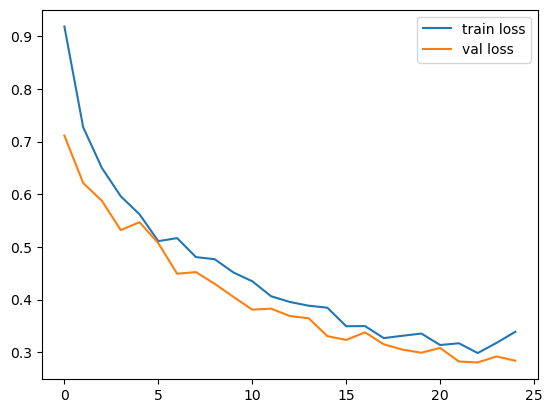

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(history_Inception.history['loss'],label='train loss')
plt.plot(history_Inception.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

<a id="10"></a> <br>
<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Result Classification 📊📈</span>

2/2 [==============================] - 8s 2s/step


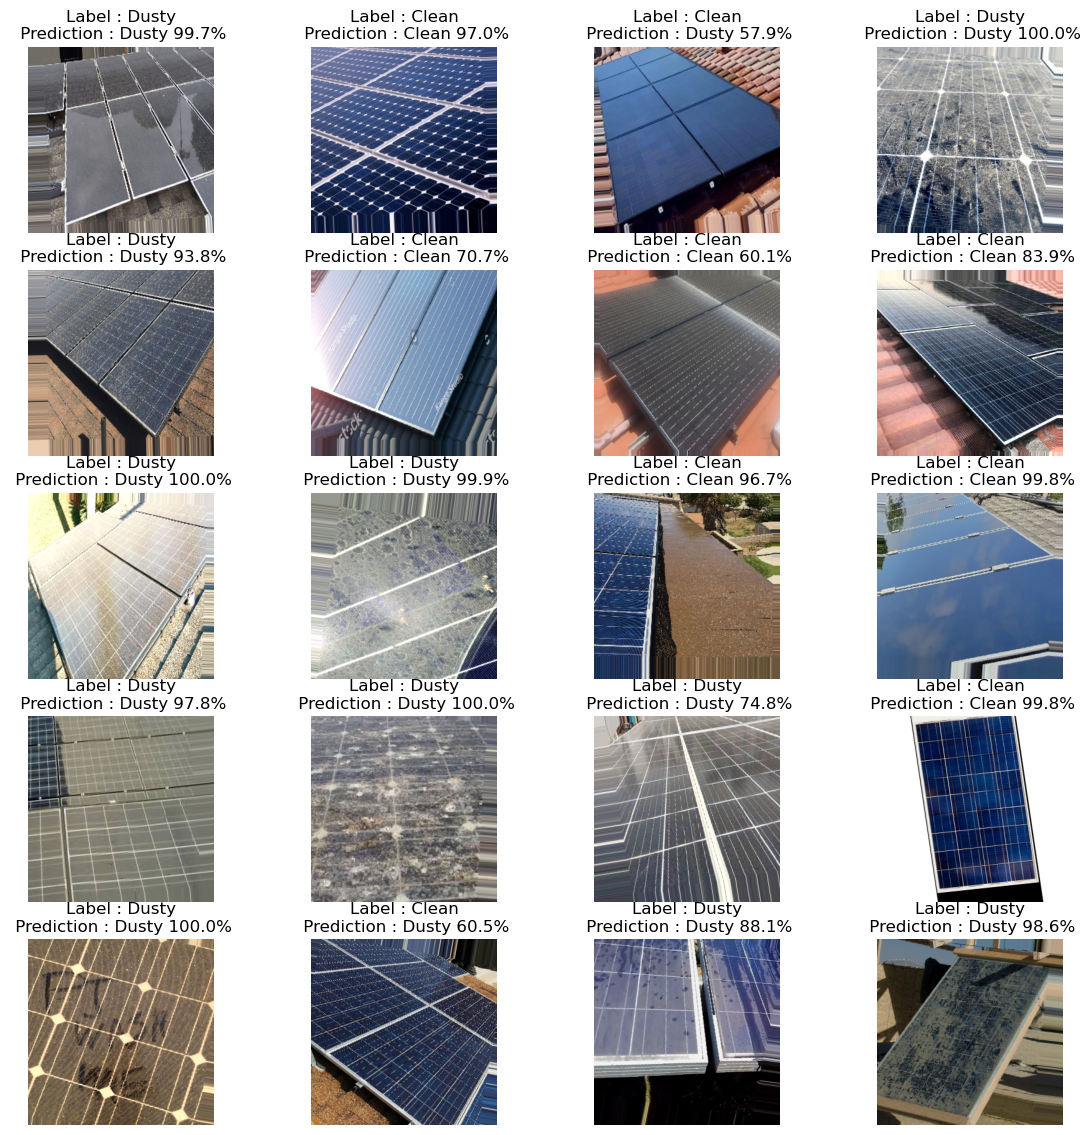

In [17]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_Inception.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

***Conclusion***

**Inception V3 is a powerful deep learning model that is used for solar panel dusty image classification tasks. It is a versatile and efficient model. It has achieved an accuracy of 93% on the solar panel dataset.**